In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_chamfer import MCUChamferModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle

In [27]:

figure_num = 10**3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
seed = 123
noise_level = 0
lw = np.array([10, -75, -75])
up = np.array([170, 75, 75])
seed = 123
param_names = np.array(["inside_angle", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up, seed = seed)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUChamferModel(k=10, c=0.12, figures=figures, params=control_vars, params_names=param_names)


In [28]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)


                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) May 07 03:00:53 AM: Your problem has 1000000 variables, 8930 constraints, and 0 parameters.
(CVXPY) May 07 03:00:54 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 07 03:00:54 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 07 03:00:54 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 07 03:00:54 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 07 03:00:54 AM: Compiling problem (target solver=SCS

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [29]:
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")
prob = mcu_model.prob
constraint_residuals = [(constraint, constraint.residual) for constraint in prob.constraints]
constraint_residuals.sort(key=lambda x: abs(x[1]), reverse=True)
print()
for i, (constraint, residual) in enumerate(constraint_residuals[:5], 1):
    print(f"{i}. Constraint: {constraint}")
    print(f"   Residual: {residual}")

rre_median_embedding_vs_params: 0.0005095627629617946
Average number of neighbors: 8.928

1. Constraint: trace(var366102) <= 119.88
   Residual: 18.75971630846925
2. Constraint: trace([[1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]
 ...
 [1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]] @ var366102) == 0.0
   Residual: 0.0006318754726534412
3. Constraint: var366102[861, 0:1000][861] + var366102[918, 0:1000][918] + -2.0 @ var366102[861, 0:1000][918] == 0.08646189849458383
   Residual: 0.0004375403595112959
4. Constraint: var366102[918, 0:1000][918] + var366102[861, 0:1000][861] + -2.0 @ var366102[918, 0:1000][861] == 0.08646189849458383
   Residual: 0.0004375403595112959
5. Constraint: var366102[330, 0:1000][330] + var366102[890, 0:1000][890] + -2.0 @ var366102[330, 0:1000][890] == 0.06272917815225046
   Residual: 0.0003577679155789826


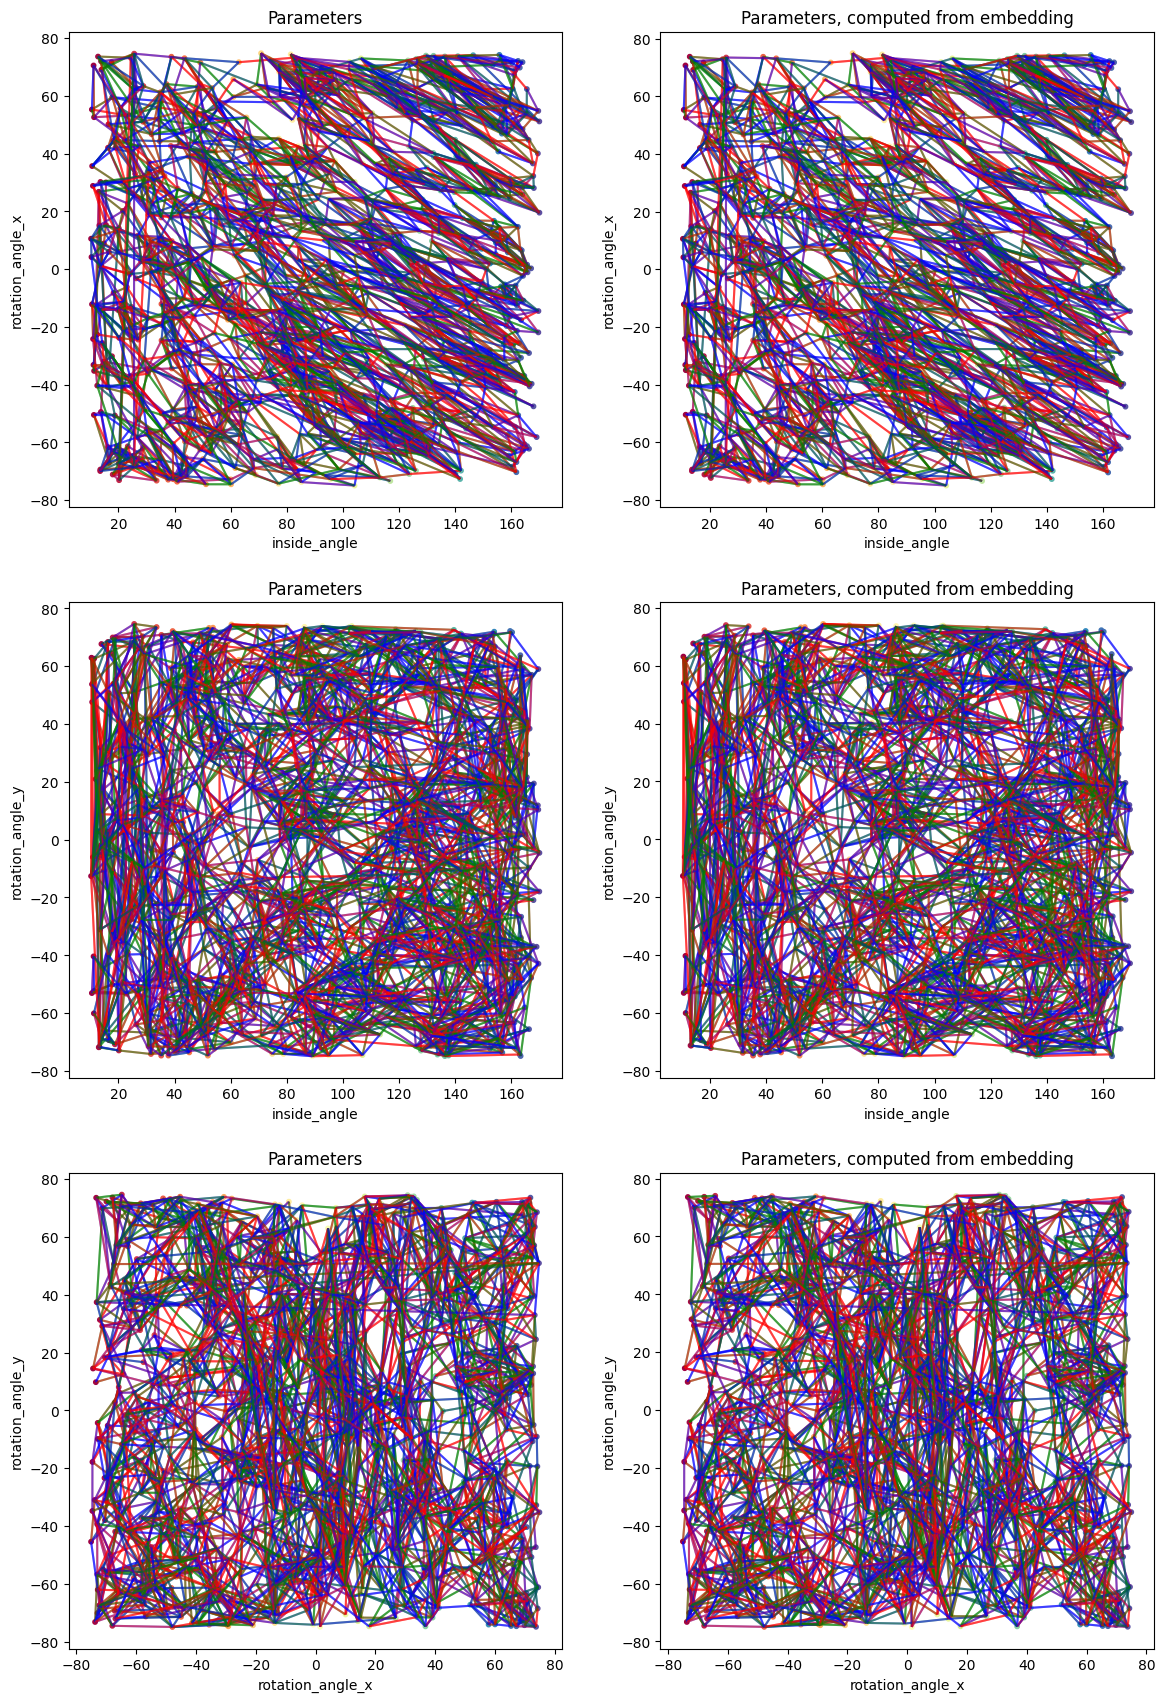

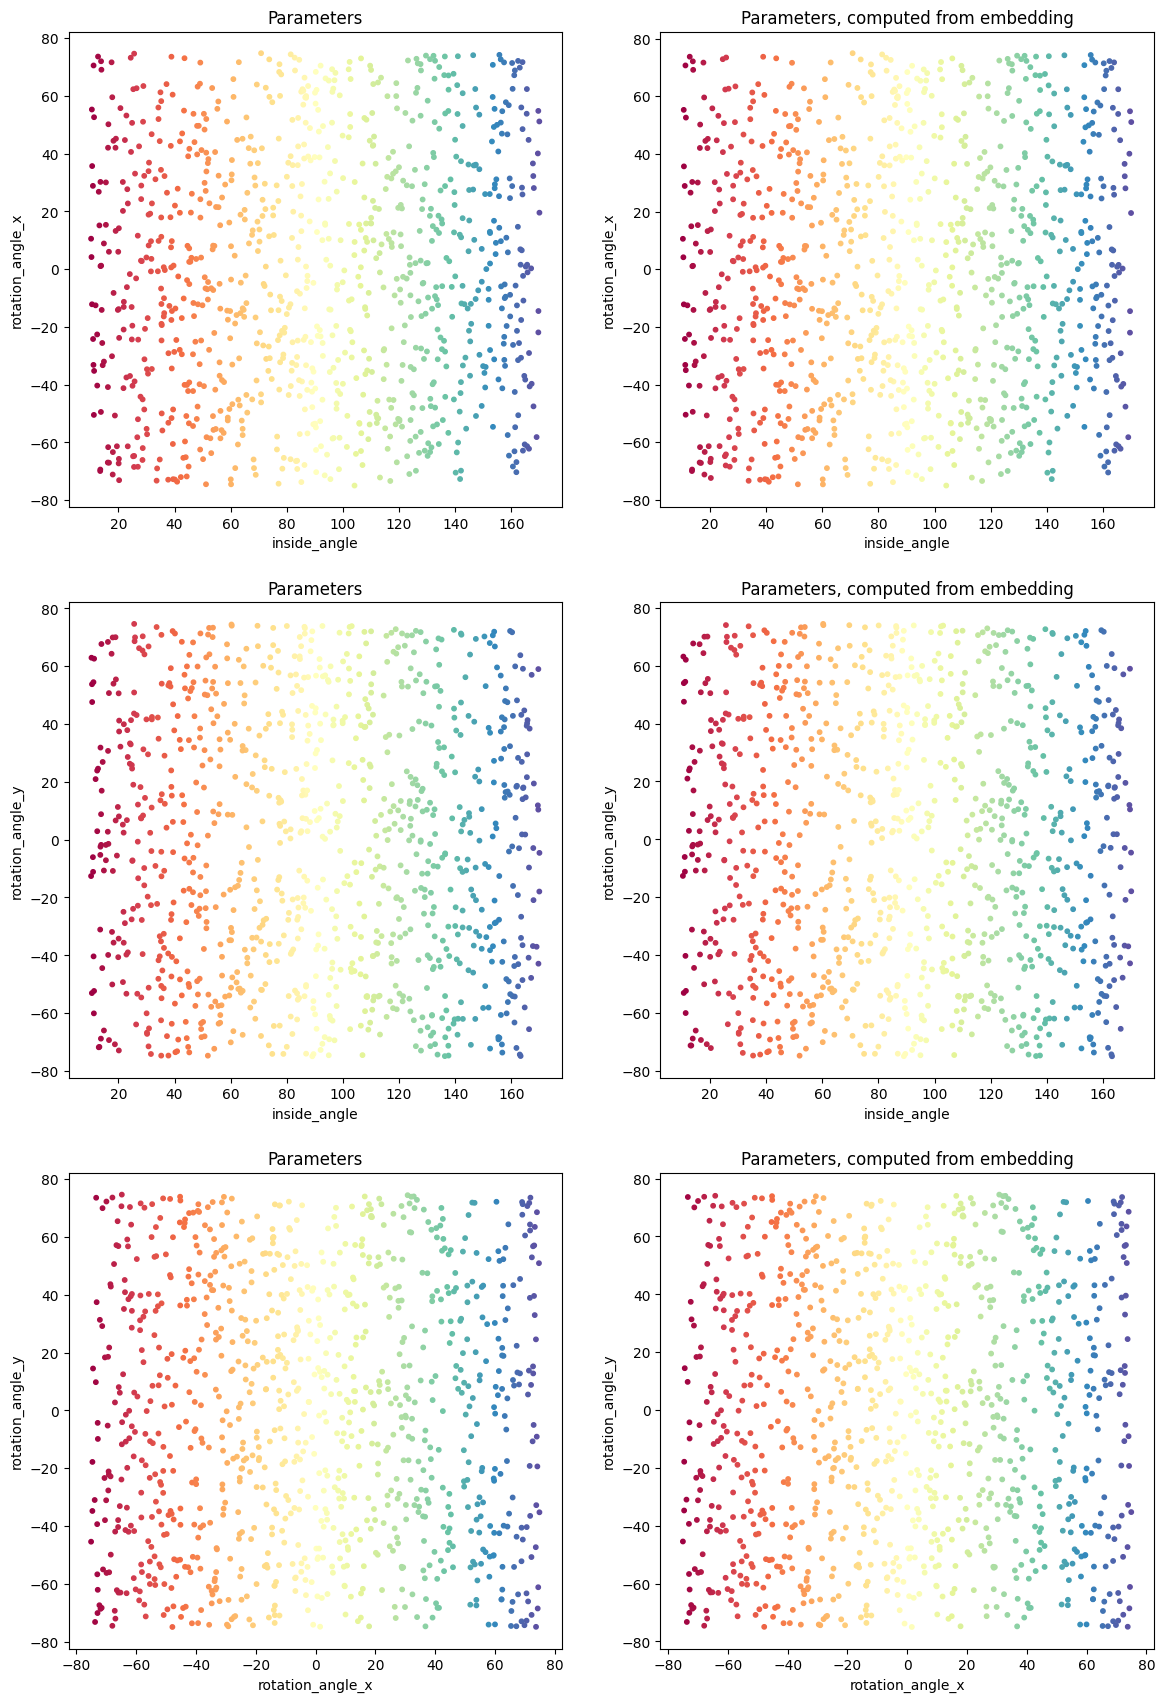

In [30]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [31]:
mcu_experiments = MCUexperiments(mcu_model)
k=4
seed=153
pieces = 5
test_size=50
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt=200, k=k, noise_level = 0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed)

[0.03265742 0.0464851  0.04668007 0.04957509]
Finding neighbors: 404 ms , optimization: 1 ms
-----------
x_opt  = [ 39.18429764 -60.87383305 -63.3433324 ], x_err = 0.0008733077666957107
x_real = [ 39.92572079 -58.67854585 -71.67056173]
[0.02690296 0.03402152 0.03587419 0.0442733 ]
Finding neighbors: 377 ms , optimization: 1 ms
-----------
x_opt  = [ 36.30797606 -62.32763923 -49.20010136], x_err = 0.003197751069025028
x_real = [ 37.41110644 -63.53528358 -46.5028821 ]
[0.02596842 0.04410916 0.05028916 0.05237877]
Finding neighbors: 384 ms , optimization: 1 ms
-----------
x_opt  = [ 20.73629674 -56.71430556 -54.85293257], x_err = 0.004932129848785106
x_real = [ 22.33762274 -57.5652575  -47.38753632]
[0.02226984 0.02653998 0.04002934 0.06047878]
Finding neighbors: 381 ms , optimization: 1 ms
-----------
x_opt  = [ 53.7547355  -44.73719331 -66.22028619], x_err = 0.4491881925713998
x_real = [ 10.262487   -45.81979789 -67.99416026]
[0.01529043 0.01558935 0.03406039 0.06642298]
Finding neighbo

In [32]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt=200, noise_level = 0, pieces_cnt=pieces, test_data_size=pieces, same_value=False, baseline=True, seed=seed)

[0.03265742 0.0464851  0.04668007 0.04957509 0.05424814 0.05970996
 0.06245613 0.06768876 0.07407512 0.0768553 ]
-----------
x_opt  = [ 44.0005718  -65.15417752 -63.02789714], x_err = 0.01261680711909867
x_real = [ 39.92572079 -58.67854585 -71.67056173]
[0.02690296 0.03402152 0.03587419 0.0442733  0.04561885 0.04738875
 0.04804523 0.0490087  0.05443929 0.06270863]
-----------
x_opt  = [ 34.74427654 -65.94461648 -40.36126248], x_err = 0.051124360289694484
x_real = [ 37.41110644 -63.53528358 -46.5028821 ]
[0.02596842 0.04410916 0.05028916 0.05237877 0.05681984 0.05692523
 0.06009779 0.06051502 0.06082209 0.06620365]
-----------
x_opt  = [ 26.73687194 -58.24098903 -53.30568843], x_err = 0.029825277634966105
x_real = [ 22.33762274 -57.5652575  -47.38753632]
[0.02226984 0.02653998 0.04002934 0.06047878 0.06403615 0.06893307
 0.06900018 0.07611017 0.08027086 0.08068293]
-----------
x_opt  = [ 13.78330855 -49.47276289 -68.83299715], x_err = 2.256958426631871
x_real = [ 10.262487   -45.8197978

In [24]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base,
    'model': mcu_model
}
with open('tmp_storage/ch_angle.pkl', 'wb') as f:
    pickle.dump(data, f)

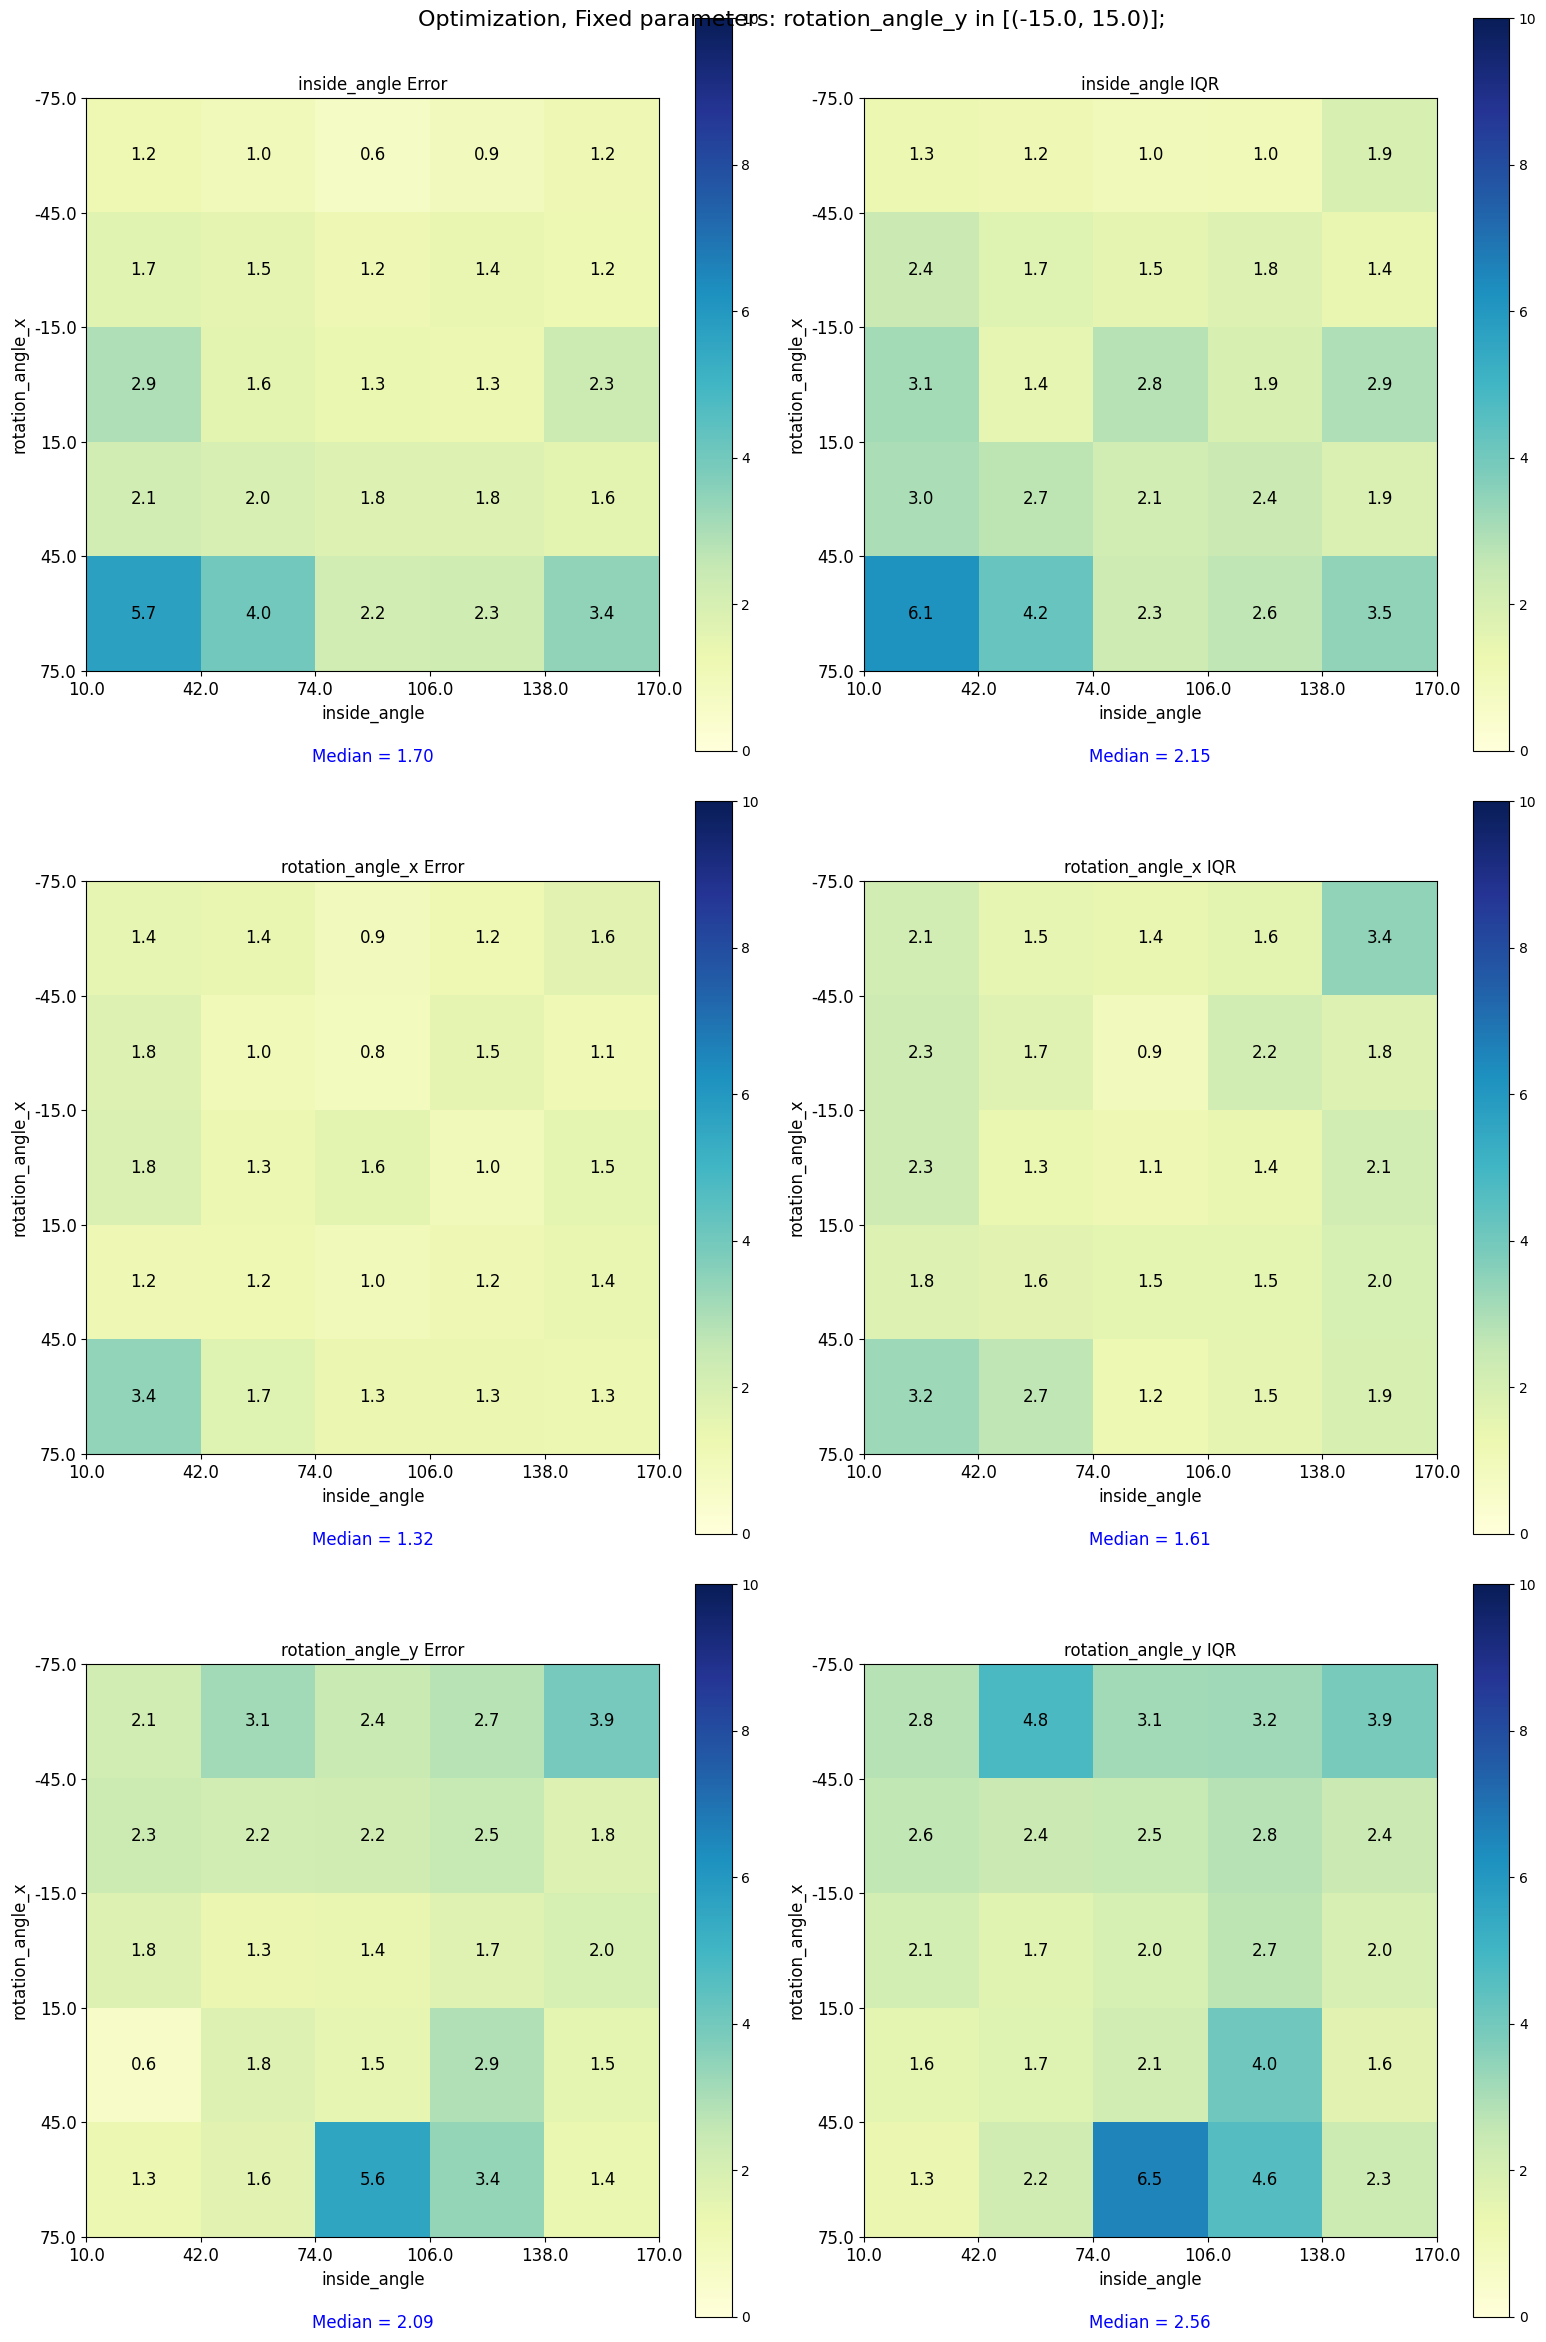

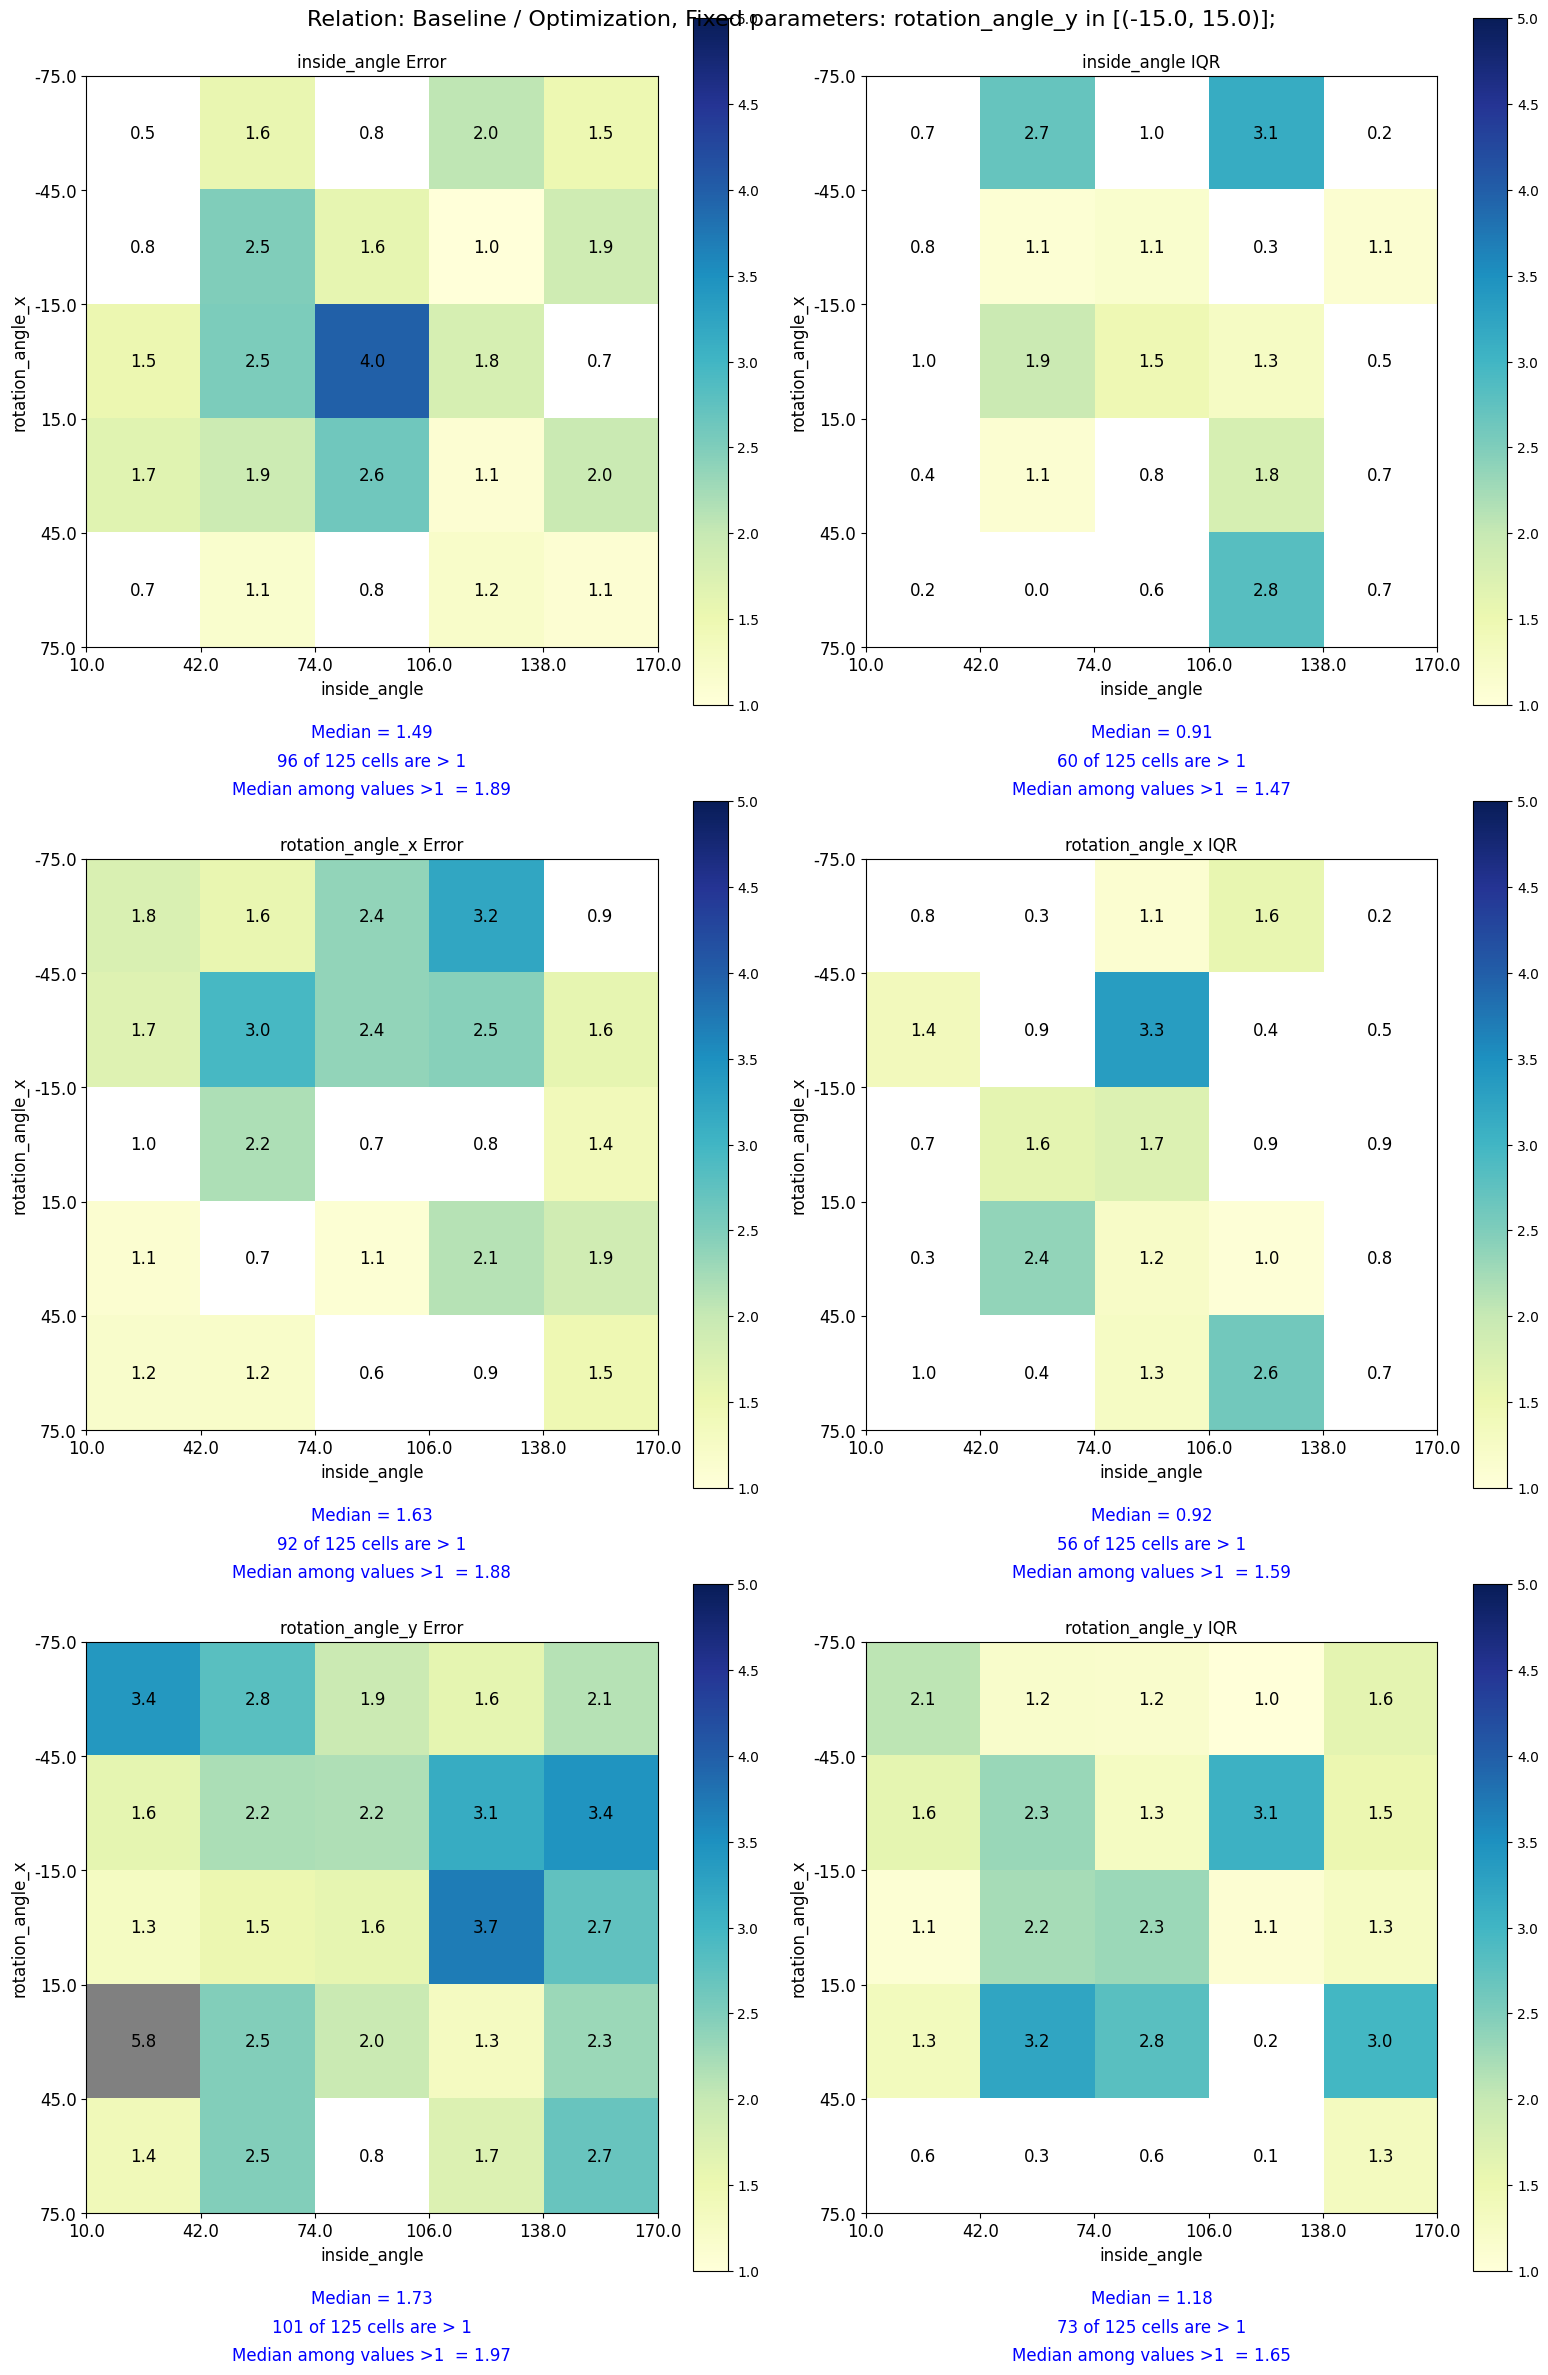

In [35]:
heatmap_lw = 0
heatmap_up=10
fixed_params = {2:2}
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_angle_2d.png", title="Optimization", lw=heatmap_lw, up=heatmap_up, fixed_params_map=fixed_params)
# mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/orig_angle_2d_base.png", title="Baseline", lw=heatmap_lw, up=heatmap_up, fixed_params_map=fixed_params)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, data['interval_runs_base'] / interval_runs, filename = f"images/orig_angle_2d_rel.png", title="Relation: Baseline / Optimization", lw=1, up=5, count_greater_than=1, fixed_params_map=fixed_params)

In [ ]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base,
    'model': mcu_model
}
with open('tmp_storage/ch_roll.pkl', 'wb') as f:
    pickle.dump(data, f)